In [2]:
from cost import cost_traj
from ptg import JMT
from traj import gen_trajectories, get_best_trajectrory


In [3]:
with open('../py/log.txt','r') as f:
    data=f.read()
import json
data1=[json.loads(a) for a in data.split('\n')[:-1] ]

needed=[]

from test import *

for i,a in enumerate(data1):
    prev_x, prev_y, end_path_s, end_path_d, car_speed, ref_yaw, other_cars=get_variables(a)
    l= (get_best_line(other_cars, line, end_path_s, car_speed))
    #print (a['d'])
    if l!=1:
        needed.append(i)

In [4]:
len(needed), len(data)

(865, 2037207)

In [5]:
from math import pi

s=pi*(1.5**2)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
weights=np.array([1000,5,1000,20,1000,50])

def draw_best_traj(trajectories, target_vehicle, other_vehicles, cnt_points=100):
    
    rr=[]
    for i in range(len(trajectories)):
        rr.append(cost_traj(trajectories[i], other_v))
        
    tmp= np.dot(np.array(rr), weights.T)
    best_traj=np.argmin(tmp)

    cnt_points=100
    points=np.zeros((cnt_points,2), dtype=np.float)

    for tri, res in enumerate(trajectories):
    
        q=res[:2]
        T=res[2]

        for i in range(cnt_points):
            t=T*float(i)/cnt_points

            s=sum([q[0][j]*t**j for j in range(6)])
            d=sum([q[1][j]*t**j for j in range(6)])
            points[i]=[s,d]

        if tri==best_traj:
            plt.scatter(points[:,0],points[:,1], color='red', s=s, alpha=0.1)
        else:
            plt.scatter(points[:,0],points[:,1], color='blue', s =s, alpha=0.01)

    
    for v in other_v:
        if v.state_in(0)[3] > 0 and v.state_in(0)[3]<4*3+2:
            for i in range(cnt_points):
                t=T*float(i)/cnt_points
                points[i]=np.array(v.state_in(t))[[0,3]]

            plt.scatter(points[:,0],points[:,1],color='green',s=s, alpha=0.01)


    plt.title('Line: %d best_line: %d' %  (round((end_path_d-2)/4), best_line))
    plt.show()
    
    return rr

In [7]:
len(needed)

865

cost: [1, 1.0, 1, 1.0, 0.0, 0.037115931656122925]
cost: [1, 0.9999996789170513, 1, 1.0, 0.0, 0.037489748349543994]
cost: [1, 0.9980906909722009, 1, 0.9999987451325496, 0.0, 0.03787112804542958]
cost: [0, 0.9607518259080217, 1, 0.9951768535040404, 0.0, 0.03826030123408675]
cost: [0, 0.8487252823092089, 1, 0.9125254071688453, 0.0, 0.03865750780903765]
cost: [0, 0.7009423878144199, 0, 0.7126763827152489, 0.0, 0.039062997548296785]
cost: [0, 0.5639180910453971, 0, 0.5095374815730389, 0.0, 0.03947703062530472]
cost: [0, 0.45334078938376066, 0, 0.3597218229663439, 0.0, 0.0398998781516533]
cost: [0, 0.36815679488118347, 0, 0.2584759710387208, 0.0, 0.04033182275391867]
cost: [1, 1.0, 1, 1.0, 0.0, 0.037115931656122925]
cost: [1, 0.9999996789170513, 1, 1.0, 0.0, 0.037489748349543994]
cost: [1, 0.9980906909722009, 1, 0.9999987451325496, 0.0, 0.03787112804542958]
cost: [0, 0.9607518259080217, 1, 0.9951768535040404, 0.0, 0.03826030123408675]
cost: [0, 0.8487252823092089, 1, 0.9125254071688453, 0.0,

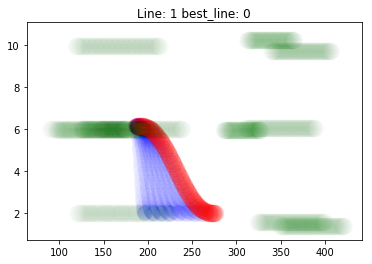

In [8]:
from helpers import Vehicle

now = needed[0]

prev_x, prev_y, end_path_s, end_path_d, car_speed, ref_yaw, other_cars=get_variables(data1[now])
best_line=get_best_line(other_cars, line, end_path_s, car_speed)


end_path_d, l

trajectories=gen_trajectories(car_speed, best_line, end_path_s, end_path_d)
vehicle = Vehicle([end_path_s,car_speed,0,end_path_d, 0,0])
other_v= [Vehicle([a[0],a[2],0,a[1],0,0]) for a in other_cars]
best_traj, cost_ob_best_traj= get_best_trajectrory(trajectories, other_v)

res=draw_best_traj(trajectories,vehicle,  other_v)

In [9]:
get_res(data1[-1])

cost: [1, 1.0, 1, 1.0, 0.0, 0.2326532930210483]
cost: [1, 0.9999994139918986, 1, 1.0, 0.0, 0.2326532930210483]
cost: [1, 0.9975061148370201, 1, 0.9999978267042433, 0.0, 0.24029773481007655]
cost: [0, 0.9545263343615038, 1, 0.9939230791870806, 0.0, 0.2603107744693067]
cost: [0, 0.8347027905903983, 1, 0.9020472588580482, 0.0, 0.27876933818670424]
cost: [0, 0.6835389577474962, 0, 0.6953682239372065, 0.0, 0.29463146627438896]
cost: [0, 0.5469389346855114, 0, 0.49335766398609326, 0.0, 0.3076245893977272]
cost: [0, 0.43827705730114475, 0, 0.3470493041913847, 0.0, 0.3179278159141816]
cost: [0, 0.35524542603031484, 0, 0.24896012904335318, 0.0, 0.32598830189630035]


ValueError: A value in x_new is above the interpolation range.

In [8]:
cost_traj(trajectories[-1], other_v)

cost: [0, 0.3663331402530554, 0, 0.257128671643563, 0.0, 0.06659438699668674]


[0, 0.3663331402530554, 0, 0.257128671643563, 0.0, 0.06659438699668674]

In [68]:
VEHICLE_RADIUS=1.5
traj=trajectories[-1]
other_vehicles=other_v

nearest=9999
T= traj[-1]
q=traj[:2]


for i in range(cnt_points):
    t=T*float(i)/cnt_points
    s=sum([q[0][j]*t**j for j in range(6)])
    d=sum([q[1][j]*t**j for j in range(6)])

    other_sd=[np.array(v.state_in(t))[[0,3]] for v in other_vehicles]
    zzz=[((s1-s)**2+(d1-d)**2)**(0.5) for s1,d1 in other_sd]
    tmp_nearst = min(zzz)
    nearest=min([tmp_nearst, nearest])
    #print (nearest)
    j=np.argmin(zzz)
    
    plt.scatter([a[0] for u,a in enumerate(other_sd) if u!=j],[a[1] for u,a in enumerate(other_sd) if u!=j], color='blue')
    plt.scatter([a[0] for u,a in enumerate(other_sd) if u==j],[a[1] for u,a in enumerate(other_sd) if u==j], color='red')
    plt.scatter([s],[d],color='green')
    
    plt.title(str(nearest))
    plt.show()

print (nearest, 2*VEHICLE_RADIUS)
#if nearest < 2*VEHICLE_RADIUS: return 1.0
#else : return 0.0

5

In [39]:
[a for u,a in enumerate(zzz) if u!=j]

[83.372874488088016,
 14.664223482932087,
 210.55477183037229,
 165.28610907668786,
 160.63113615552027,
 30.468686554744284,
 41.202469564550299,
 59.066274952492172,
 41.852065521407802,
 20.101675528140898,
 127.99243722906762]

In [41]:
other_sd

[array([ 1728.32563478,     1.978347  ]),
 array([ 1656.35257176,     1.867815  ]),
 array([ 1641.0396127,     1.990157 ]),
 array([ 1873.49770923,     5.87186   ]),
 array([ 1812.84730458,     9.845184  ]),
 array([ 1804.50942537,     5.826517  ]),
 array([ 1598.85428681,     6.119683  ]),
 array([ 1589.36502354,     2.569299  ]),
 array([ 1700.44073145,     5.958976  ]),
 array([ 1686.16366592,     5.91197   ]),
 array([ 1676.08946918,     5.903057  ]),
 array([ 1773.18765364,     2.034388  ])]

In [42]:
s, d

(1655.4275464719508, 9.9892400073916043)